## Motivation {.unnumbered}



In [30]:
## set up environment
suppressMessages({
library(scUnify)
library(clustree)
setwd("/nemo/lab/caladod/working/Matthew/project/matthew/MH_GSE247917")})

## import seurat objects
obj <- qread("seurat/1_processing/1.4_GSE247917_qc.qs")

In [4]:
obj.list <- SplitObject(obj, split.by = "samples")

In [2]:
## store a list of 10x output directories as a vector & define sample names
dir <- "/nemo/lab/caladod/scratch/hungm/matthew/MH_GSE247917/cellranger/"
samples = list.files(dir)
dir.list <- paste0(dir, samples, "/outs/per_sample_outs/", samples, "/count/sample_filtered_feature_bc_matrix/")
dir.list

[1] "/nemo/lab/caladod/scratch/hungm/matthew/MH_GSE247917/cellranger/CV10/outs/per_sample_outs/CV10/count/sample_filtered_feature_bc_matrix/"
[2] "/nemo/lab/caladod/scratch/hungm/matthew/MH_GSE247917/cellranger/CV12/outs/per_sample_outs/CV12/count/sample_filtered_feature_bc_matrix/"

In [16]:
for(i in seq_along(obj.list)){
    obj.list[[i]] <- run_decontx(x = obj.list[[i]], raw.dir = dir.list[i], cluster = "integrated_snn_res.0.2")}

10X data contains more than one type and is being returned as a list containing matrices of each type.

--------------------------------------------------

Starting DecontX

--------------------------------------------------

Thu Nov  7 00:30:29 2024 .. Analyzing all cells

Thu Nov  7 00:30:29 2024 .... Generating UMAP

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Thu Nov  7 00:31:02 2024 .... Estimating contamination

Thu Nov  7 00:31:06 2024 ...... Completed iteration: 10 | converge: 0.004858

Thu Nov  7 00:31:09 2024 ...... Completed iteration: 20 | converge: 0.001528

Thu Nov  7 00:31:10 2024 ...... Completed iteration: 24 | converge: 0.0009542

Thu Nov  7 00:31:10 2024 .. Calculating fi

In [21]:
obj.list[[1]]

An object of class Seurat 
84349 features across 19484 samples within 8 assays 
Active assay: integrated (14868 features, 2000 variable features)
 2 layers present: data, scale.data
 7 other assays present: RNA, HTO, ADT, BCR, TCR, SCT, DX
 2 dimensional reductions calculated: pca, umap

In [20]:
head(obj.list[[1]]@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_HTO,nFeature_HTO,nCount_ADT,nFeature_ADT,samples,pct.mt,pct.rb,⋯,integrated_snn_res.0.5,integrated_snn_res.0.6,integrated_snn_res.0.7,integrated_snn_res.0.8,integrated_snn_res.0.9,integrated_snn_res.1,seurat_clusters,sc.decontx,nCount_DX,nFeature_DX
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>
CV10_AAACCTGAGAAGCCCA-1,SeuratProject,2075,1226,91,3,1336,58,CV10,2.602410,11.036145,⋯,0,0,1,6,9,10,10,0.0002442453,2074.524,1226
CV10_AAACCTGAGAGGGATA-1,SeuratProject,4110,2205,257,3,1008,57,CV10,4.452555,7.542579,⋯,2,1,0,0,0,0,0,0.0029265071,4099.602,2205
CV10_AAACCTGAGAGTGACC-1,SeuratProject,1216,785,88,2,829,57,CV10,3.207237,18.256579,⋯,4,3,4,1,4,5,5,0.0030700745,1212.775,785
CV10_AAACCTGAGATATGGT-1,SeuratProject,6005,2865,599,4,3661,57,CV10,5.711907,5.911740,⋯,0,0,1,6,9,10,10,0.0168573392,5907.521,2865
CV10_AAACCTGAGCCAGTAG-1,SeuratProject,1318,774,70,3,1216,58,CV10,3.490137,23.216995,⋯,4,2,4,1,5,5,5,0.0010559878,1316.788,774
CV10_AAACCTGAGCGATATA-1,SeuratProject,1739,1131,84,4,700,57,CV10,4.025302,6.382979,⋯,2,1,0,0,0,0,0,0.0022682403,1735.578,1131


In [22]:
obj <- merge(obj.list[[1]], obj.list[2:length(obj.list)])

## Quick Processing

In [24]:
obj <- join_layers(obj)
obj <- join_layers(obj, assay = "DX")

In [25]:
obj <- integrate_v4(obj, split.by = "samples", assay = "DX", nfeatures = 2000, method = "rpca", k.weight = 100)

Running SCTransform on assay: DX

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 21859 by 19484

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Found 135 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 21859 genes

Computing corrected count matrix for 21859 genes

Calculating gene attributes

Wall clock passed: Time difference of 1.210969 mins

Determine variable features

Centering data matrix

Getting residuals for block 1(of 4) for counts dataset

Getting residuals for block 2(of 4) for counts dataset

Getting residuals for block 3(of 4) for counts dataset

Getting residuals for block 4(of 4) for counts dataset

Centering data matrix

Finished calculating residuals for counts

Warning message:
“Different cells and/or

  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_ACTATCTGTATATGAG-1 .. CV10_ATGTGTGGTATTCTCT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12189 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_ATGTGTGGTCGACTAT-1 .. CV10_CATTATCAGGTCATCT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12189 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_CATTATCAGTACGATA-1 .. CV10_CGGAGTCTCTCTTGAT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12189 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_CGGAGTCTCTTAGCCC-1 .. CV10_CTTAACTTCGAATGGG-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12189 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_CTTAACTTCGCCATAA-1 .. CV10_GCCTCTACAATCAGAA-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12189 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_GCCTCTACACAGCCCA-1 .. CV10_GTACGTATCTGGTATG-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12189 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_GTACTCCAGACTCGGA-1 .. CV10_TATCAGGTCTTGCATT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12189 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV10_TATCAGGTCTTGGGTA-1 .. CV10_TGGACGCAGCCCAATT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12189 genes



  |======================================================================| 100%


sct.model: counts on 1484 cells: CV10_TGGACGCAGCGACGTA-1 .. CV10_TTTGTCATCTTTAGGG-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12189 genes



  |======================================================================| 100%
[1] 1


Warning message:
“Different cells and/or features from existing assay SCT”
sct.model: counts on 2000 cells: CV12_AAACCTGAGAGCCTAG-1 .. CV12_ACTTACTGTTTACTCT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12189 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_ACTTACTTCAATCACG-1 .. CV12_CAAGATCCAAGCTGTT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12189 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_CAAGATCCAATGAAAC-1 .. CV12_CCTAAAGGTGGAAAGA-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12189 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_CCTAAAGGTGTCAATC-1 .. CV12_CTCACACAGGTACTCT-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12189 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_CTCACACAGTGGGCTA-1 .. CV12_GATCGTATCACGGTTA-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12189 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_GATCGTATCATACGGT-1 .. CV12_GGGATGACAGCTATTG-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12189 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_GGGATGACAGCTCGCA-1 .. CV12_TACTTGTGTCGGCTCA-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12189 genes



  |======================================================================| 100%


sct.model: counts on 2000 cells: CV12_TACTTGTGTCTCTTAT-1 .. CV12_TGCTGCTTCGCCCTTA-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12189 genes



  |======================================================================| 100%


sct.model: counts on 1366 cells: CV12_TGCTGCTTCGGCGCTA-1 .. CV12_TTTGTCATCTGCCCTA-1

Setting min_variance to:  0.04

Calculating residuals of type pearson for 12189 genes



  |======================================================================| 100%
[1] 2


Warning message:
“Different cells and/or features from existing assay SCT”
Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Assay integrated changing from SCTAssay to Assay”
Warning message:
“Different cells and/or features from existing assay integrated”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 3.9 GiB”
Warning message:
“Assay integrated changing from Assay to SCTAssay”
Warning message:
“Different cells and/or features from existing assay SCT”


PC_ 1 
Positive:  SEPTIN5, ERBB2, IL7R, TBK1, GNLY, AL050309.1, RORA, LEF1, PLEKHB2, RNF135 
	   TGFBR3, CCL5, PDE3B, NELL2, KAT5, CD5, HIVEP2, TWF2, NKG7, NCAPD2 
	   CD8A, ADAM9, NADK, ITK, GZMK, C16orf72, ZMIZ2, HIRIP3, G6PD, LTB 
Negative:  ZNF385D, CDK6, MED12L, ATP8B4, GUCY1B1, TUBB1, SOX4, DEPTOR, MMRN1, IL1B 
	   ZNF804A, CD74, TAFA2, TCF4, ANKRD28, NFE2, PYGL, PRSS57, MPP1, H1F0 
	   STON2, STMN1, HMOX1, EREG, LRMDA, KDM5B, G0S2, CFAP54, FTH1, SLC8A1 
PC_ 2 
Positive:  ZNF385D, GNLY, PRF1, NKG7, IL7R, CTSW, CD247, MALAT1, CCL5, LEF1 
	   INPP4B, HIST1H1E, CD69, IL2RB, GZMB, NELL2, KLRK1, ITK, THEMIS, FGFBP2 
	   SYNE2, TESPA1, RPS12, SPOCK2, CST7, ZAP70, STAT4, LTB, SYNE1, MYOM2 
Negative:  LYZ, S100A9, FOS, VCAN, IFI30, PSAP, S100A8, FTL, CD74, FTH1 
	   FCN1, CST3, NAMPT, SAT1, CTSS, SERPINA1, MNDA, TNFAIP2, CYBB, NEAT1 
	   CD36, AIF1, PLAUR, DMXL2, SPI1, TYMP, LRMDA, TYROBP, SLC8A1, PLXDC2 
PC_ 3 
Positive:  GNLY, NKG7, PRF1, CTSW, CX3CR1, FGFBP2, GZMB, FCGR3A, MYOM2, SPON

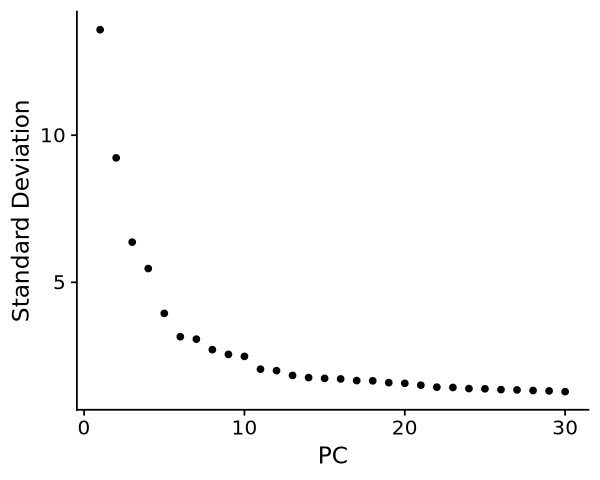

In [26]:
options(repr.plot.width=5, repr.plot.height=4)
obj <- RunPCA(obj)
ElbowPlot(obj, ndims = 30, reduction = "pca")

In [36]:
obj <- RunUMAP(obj, dims = 1:10, reduction = "pca", reduction.name = "umap", assay = "RNA", verbose = FALSE)

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’



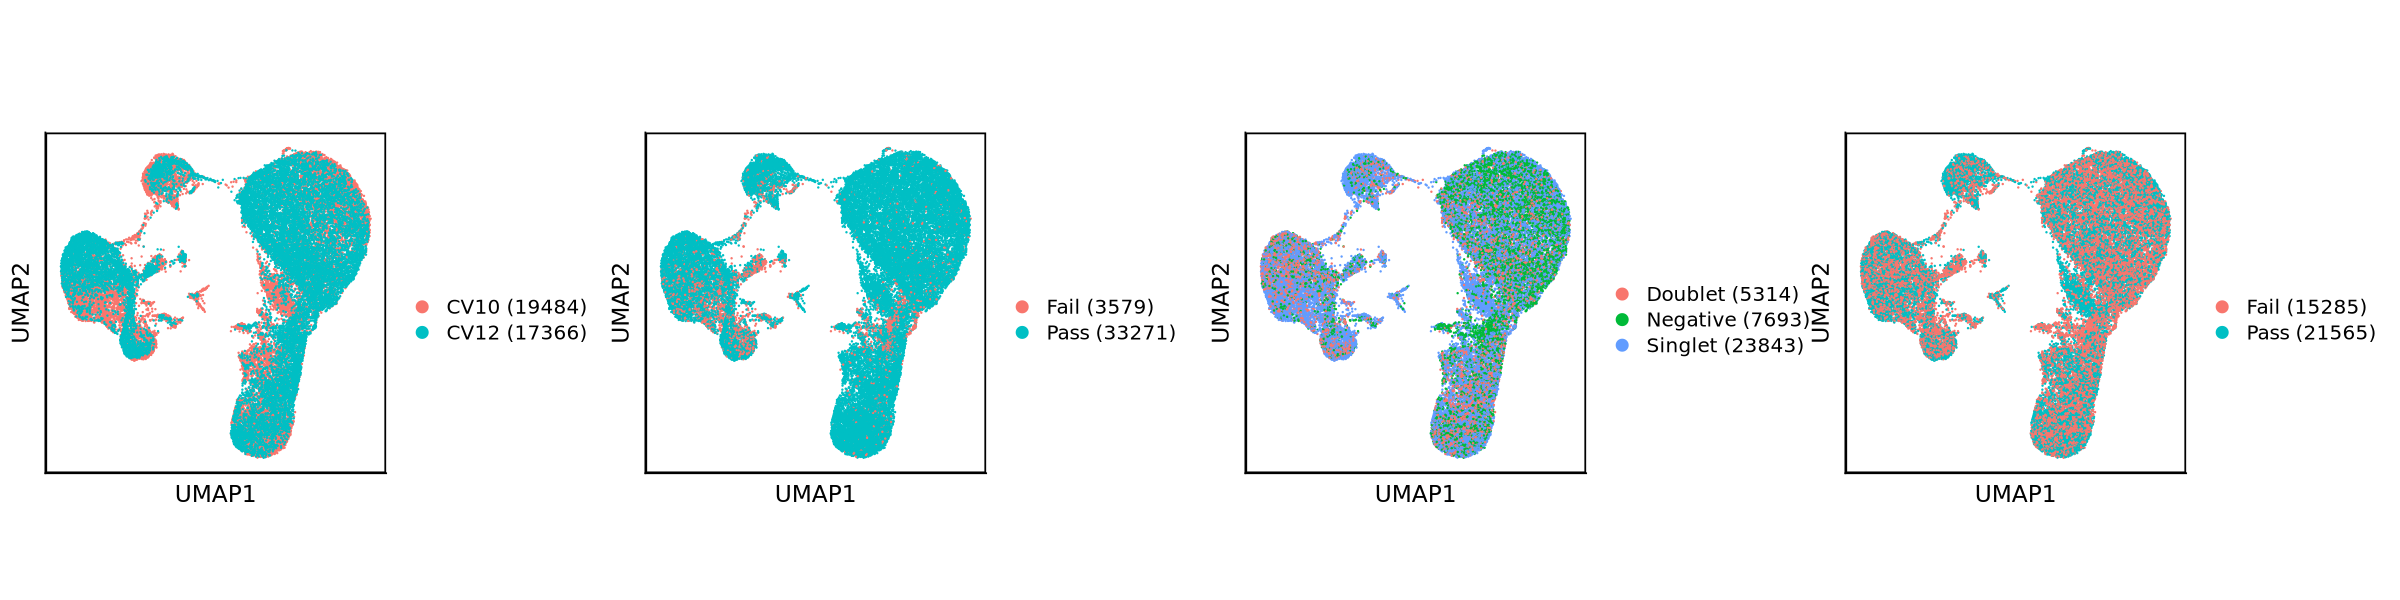

In [37]:
options(repr.plot.width=20, repr.plot.height=5)
p1 <- scUMAP(obj, reduction = "umap", group.by = "samples", count = T)
p2 <- scUMAP(obj, reduction = "umap", group.by = "softqc", count = T)
p3 <- scUMAP(obj, reduction = "umap", group.by = "MULTI.global", count = T)
p4 <- scUMAP(obj, reduction = "umap", group.by = "finalqc", count = T)
plot_grid(p1, p2, p3, p4, ncol = 4, align = "hv")

In [38]:
obj <- FindNeighbors(obj, reduction = "pca", dims = 1:10, verbose = F)
obj <- FindClusters(obj, resolution = seq(0.1, 1, 0.1), algorithm = 1, verbose = F)
clustree <- clustree(obj@meta.data, prefix = paste0("integrated_snn_res."))

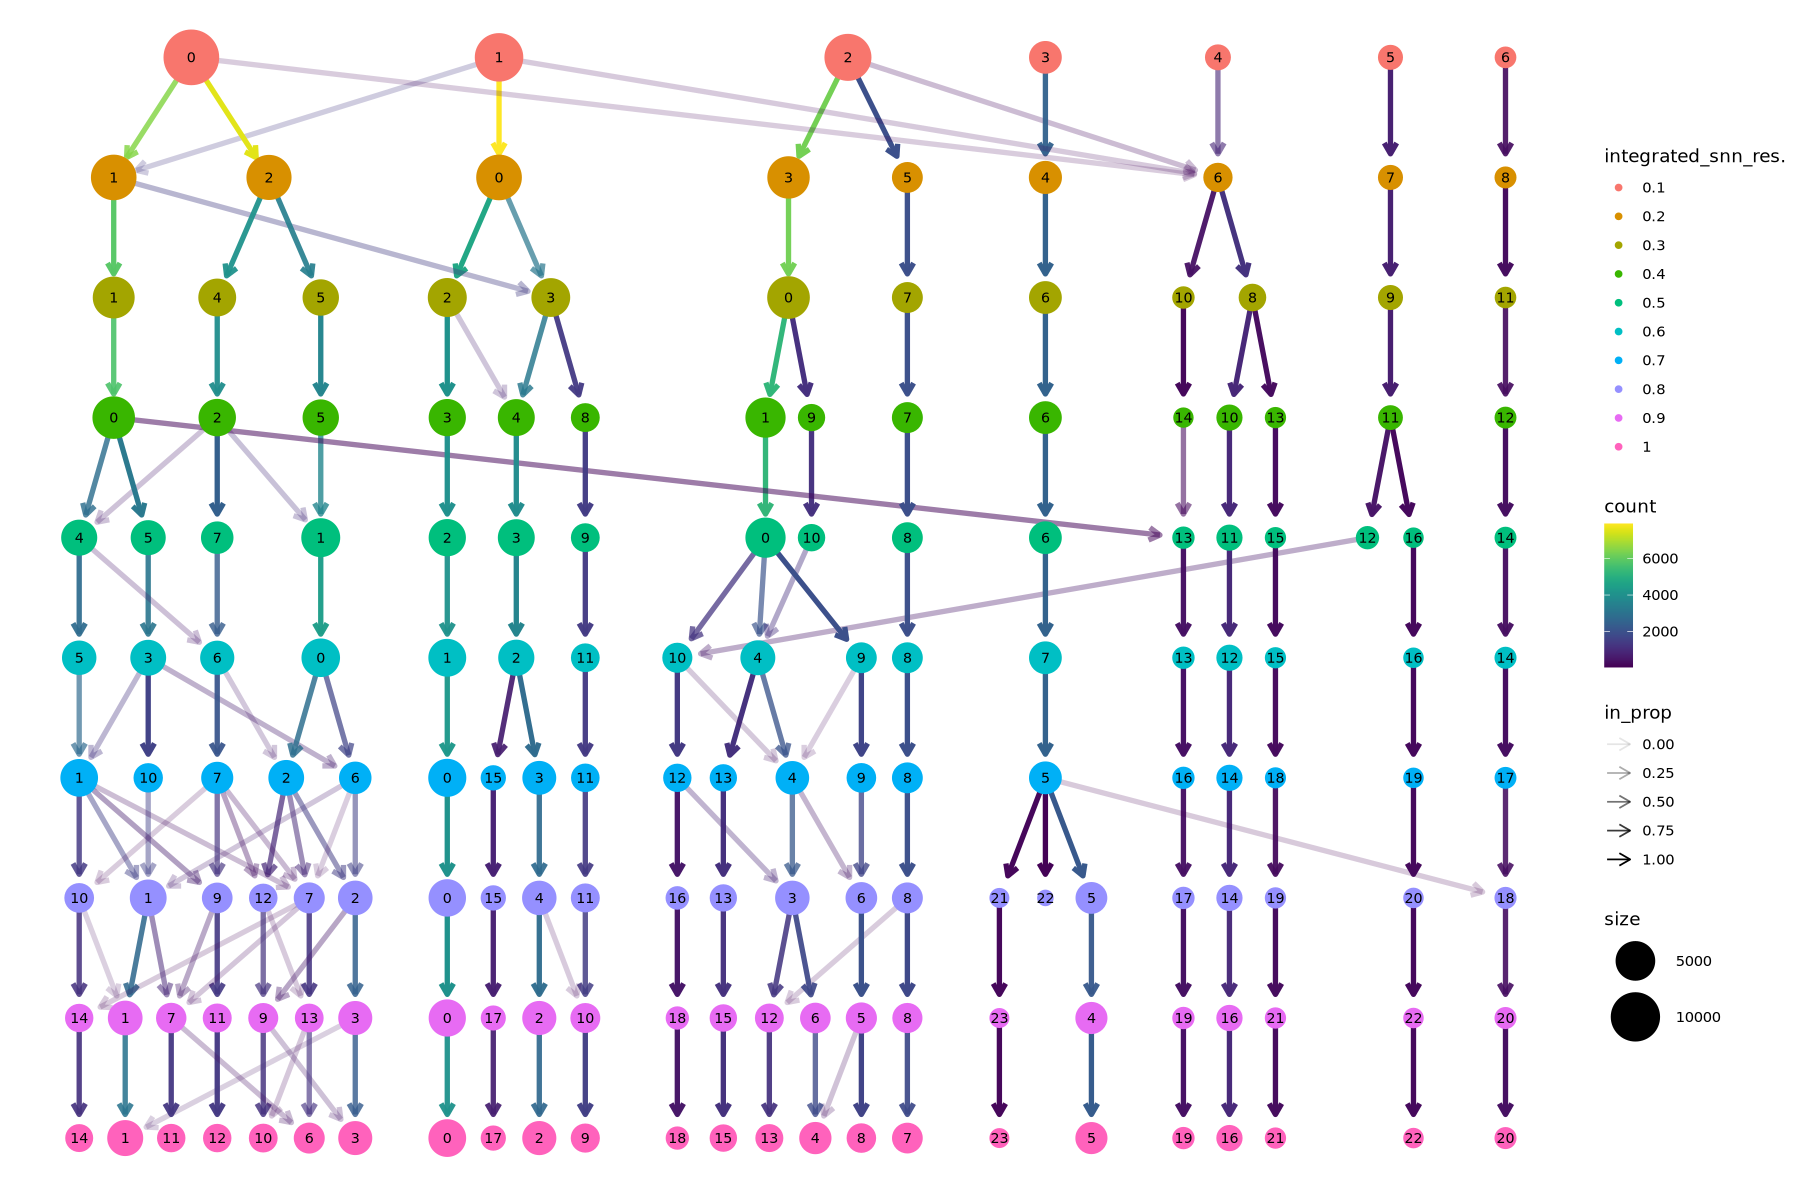

In [39]:
options(repr.plot.width=15, repr.plot.height=10)
print(clustree)

In [40]:
obj

An object of class Seurat 
60789 features across 36850 samples within 7 assays 
Active assay: integrated (14868 features, 2000 variable features)
 2 layers present: data, scale.data
 6 other assays present: RNA, HTO, ADT, BCR, TCR, SCT
 2 dimensional reductions calculated: pca, umap

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


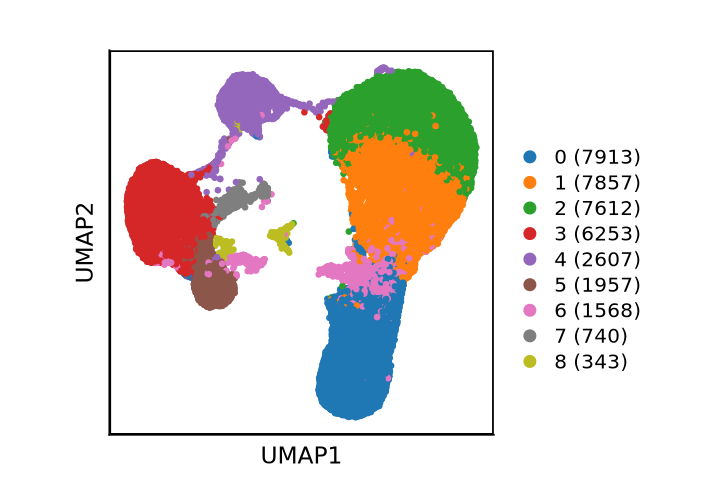

In [41]:
options(repr.plot.width=6, repr.plot.height=4)
scUMAP(obj, reduction = "umap", group.by = "integrated_snn_res.0.2", count = T, pt.size = 1.2, cols = palette_list[["vega_10"]])

In [42]:
qsave(obj, "seurat/1_processing/1.5_GSE247917_decont.qs")

In [15]:
run_decontx <- function(x, raw.dir, cluster = NULL, assay = "RNA"){
    toc <- x[[assay]]$counts
    tod <- Read10X(raw.dir)[["Gene Expression"]]
    colnames(tod) <- paste0(gsub("_.*", "", colnames(toc)[1]), "_", colnames(tod))
    tod <- tod[rownames(toc), which(!colnames(tod) %in% colnames(toc))]
    output <- celda::decontX(toc, background = tod, z = cluster)

    ## add contamination score
    score <- data.frame(sc.decontx = output$contamination)
    rownames(score) <- colnames(output$decontXcounts)
    x <- AddMetaData(x, score)

    ## add decontaminated counts
    rna.clean <- as(output$decontXcounts[,colnames(x)], "sparseMatrix")
    x[["DX"]] <- CreateAssay5Object(counts = rna.clean, min.cells = 0, min.features = 0)
    return(x)
    }